In [1]:
import pandas as pd
df1=pd.read_csv("C:\\Users\\Iyan\\Downloads\\DataCO2.csv")
df1

,Nama,Model,Volume,Bobot,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105
5,VW,Up!,1000,929,105
6,Skoda,Fabia,1400,1109,90
7,Mercedes,A-Class,1500,1365,92
8,Ford,Fiesta,1500,1112,98
9,Audi,A1,1600,1150,99


In [2]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Nama    36 non-null     object
 1   Model   36 non-null     object
 2   Volume  36 non-null     int64 
 3   Bobot   36 non-null     int64 
 4   CO2     36 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.5+ KB


In [7]:
numerik=[]
for i in df1.columns.to_list():
    if df1[i].dtypes!='O':
        numerik.append(i)

numerik

['Volume', 'Bobot', 'CO2']

MSE: 51.698353637313716
RMSE: 7.190156718550279
MAE: 5.824670969484398
R-squared: 0.37796098564729486


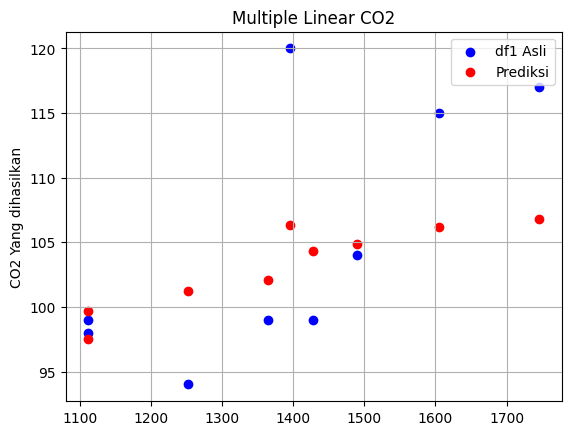

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = np.array([df1['Bobot'], df1['Volume']]).T
y = np.array(df1['CO2'])

# Membagi df1set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.235, random_state=42)

# Membuat model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi pada df1 uji
y_pred_test = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)

# Visualisasi
plt.scatter(X_test[:, 0], y_test, color='blue', label='df1 Asli')
plt.scatter(X_test[:, 0], y_pred_test, color='red', label='Prediksi')
plt.title('Multiple Linear CO2')
plt.ylabel('CO2 Yang dihasilkan')
plt.legend()
plt.grid(True)
plt.show()